In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.10.0
GPU Available: 1


In [2]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt

In [3]:
print(pd.__version__)

2.0.3


In [4]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
x=df.drop(['Species','Id'],axis=1).values
y=df['Species'].values

In [6]:
encoder=LabelEncoder()
y_labeled=encoder.fit_transform(y)
y_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y_onehot=to_categorical(y_labeled)
y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [8]:
with open('encoder.bin','wb') as f:
    pickle.dump(encoder,f)

In [9]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
res=model.fit(x,y_onehot,epochs=300, validation_split=0.1)

Epoch 1/300
5/5 [==============================] - 0s 25ms/step - loss: 0.5412 - accuracy: 0.7407 - val_loss: 1.3483 - val_accuracy: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5405 - accuracy: 0.7407 - val_loss: 1.3454 - val_accuracy: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5398 - accuracy: 0.7407 - val_loss: 1.3414 - val_accuracy: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5388 - accuracy: 0.7407 - val_loss: 1.3371 - val_accuracy: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5379 - accuracy: 0.7407 - val_loss: 1.3319 - val_accuracy: 0.0000e+00
Epoch 6/300
5/5 [==============================] - 0s 13ms/step - loss: 0.5368 - accuracy: 0.7407 - val_loss: 1.3250 - val_accuracy: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5357 - accuracy: 0.7407 - val_loss: 1.3179 - val_accuracy: 0.0

In [19]:
model.predict(np.array([[1,2,3,4]]))

1/1 [==============================] - 0s 25ms/step


array([[0.04604877, 0.32496613, 0.6289851 ]], dtype=float32)

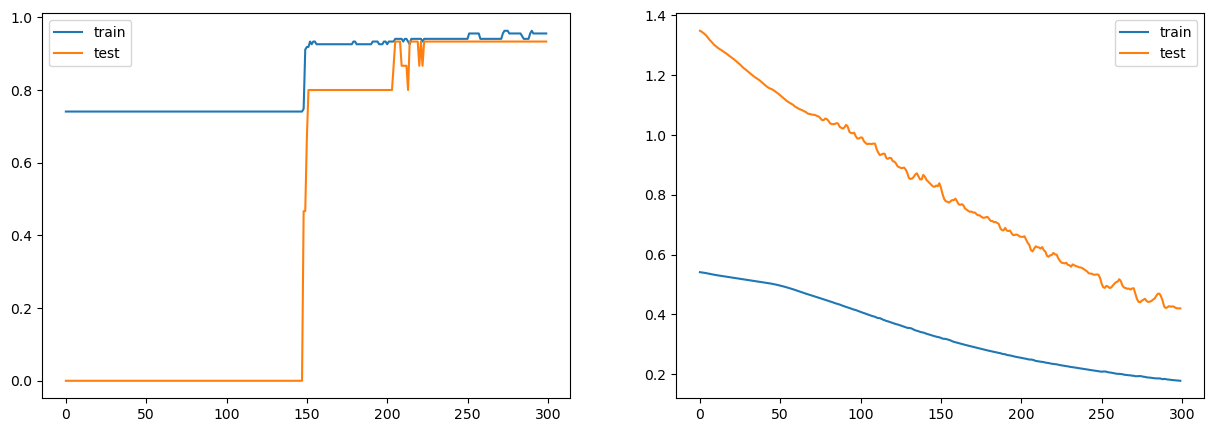

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])


plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test'])

In [24]:
model.save('model.h5')